# Predicting Bike Rentals
 
In this project, the aim is to predict the total number of bikes being rented in an hour in the city of Washington D.C. in USA. The dataset for this can be downloaded from the University of California, Irvine's [website](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

## Importing the libraries and the Dataset

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [2]:
bike_rentals = pd.read_csv("C:/Users/Dhruv Pandya/Desktop/books and stuff/datasets/hour.csv")
bike_rentals.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


The columns of the dataset are summarized below:

1. <b>instant</b> - A unique sequential ID number for each row
2. <b>dteday</b> - The date of the rentals
3. <b>season</b> - The season in which the rentals occurred
4. <b>yr</b> - The year the rentals occurred
5. <b>mnth</b> - The month the rentals occurred
6. <b>hr</b> - The hour the rentals occurred
7. <b>holiday</b> - Whether or not the day was a holiday
8. <b>weekday</b> - The day of the week (as a number, 0 to 7)
9. <b>workingday</b> - Whether or not the day was a working day
10. <b>weathersit</b> - The weather (as a categorical variable)
11. <b>temp</b> - The temperature, on a 0-1 scale
12. <b>atemp</b> - The adjusted temperature
13. <b>hum</b> - The humidity, on a 0-1 scale
14. <b>windspeed</b> - The wind speed, on a 0-1 scale
15. <b>casual</b> - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
16. <b>registered</b> - The number of registered riders (people who had already signed up)
17 <b>cnt</b> - The total number of bike rentals (casual + registered)

## Extracting Correlations and other Information about the cnt column

(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

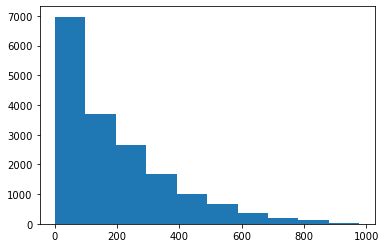

In [3]:
plt.hist(bike_rentals['cnt'],bins=10)

In the above graph, we can see that count of rentals for some most hours is about 100 - 400 bikes. There are very less cases that more than 800 bikes are rented in an hour.

In [4]:
corr_matrix = bike_rentals.corr()
corr_matrix['cnt'].sort_values()

hum          -0.322911
weathersit   -0.142426
holiday      -0.030927
weekday       0.026900
workingday    0.030284
windspeed     0.093234
mnth          0.120638
season        0.178056
yr            0.250495
instant       0.278379
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

We have used pearson correlation above which means that a correlation value near to 1 or -1 for two columns signifies that those two columns are closely correlated. Higher the absolute value of correlation between 2 variables, more correlated are those variables. Pearson correlation reflects linear correlation between variables.

It can be seen from the above output that apart from the cnt column which of course will show a correlation cofficient of 1, we have the columns registered and casual which are highly correlated with the cnt column.

## Assigning labels for hours
We can assign labels to by grouping hours together so that the machine has an idea of how the times are related to each other. The hours 6 to 12 refer to the morning time. We use the label 1 for this. Similarly we use labels for each next 6 hour periods representing afternoon, evening and night time.

In [5]:
def assign_label(hour):
    if hour >= 6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >=18 and hour <= 24:
        return 3
    else:
        return 4
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

bike_rentals[['hr', 'time_label']]


,hr,time_label
0,0,4
1,1,4
2,2,4
3,3,4
4,4,4
...,...,...
17374,19,3
17375,20,3
17376,21,3
17377,22,3


## Error metric
We have to use mean squared error (MSE) as the error metric as the column that we are trying to predict is continuous and MSE is an appropriate choice for continuous variables.

## Dividing the data into Test and Train sets
We use 80 percent of the data to train our machine learning model and remaining 20 percent data as the test data.

In [6]:
sample_length = int(np.floor(0.8*len(bike_rentals)))
indices = bike_rentals.sample(sample_length,random_state = 1).index
train = bike_rentals.iloc[indices]
test = bike_rentals.drop(index = indices)


## Linear Regression
As the variable that we have to predict is a continuous variable we can use linear regression to predict the cnt variables. We have to ignore the <b>casual</b> and <b>registered</b> columns because the <b>cnt</b> column is directly calculated from these columns.

<AxesSubplot:>

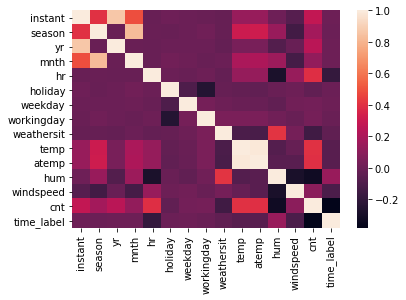

In [7]:
features = list(train.columns)
features.remove('casual')
features.remove('registered')
corr_matrix = train[features].corr()

sns.heatmap(corr_matrix)

As we see from the above correlation matrix, we can drop one of the features from a highly correlated pair of two features. Having 2 highly correlated features such as mnth and season which have a correlation coffecient greater than 0.8 will make our linear regression model biased.
The following columns can be dropped:
1. <b>instant</b> as it represents the index of the entry of the record. So it has no relation in the task of predicting the cnt value. Also it shows unnecessarily high correlation with the <b>yr</b> column.
2. <b>hr</b> column as we have already converted the data in this column to time_label which can be easily interpreted by the machine.
3. <b>atemp</b> column as this column has a very high correlation with the temp column


In [8]:
features = list(train.columns)
features.remove('casual')
features.remove('registered')
features.remove('instant')
features.remove('cnt')
features.remove('dteday')

In [9]:
lr = LinearRegression()
lr.fit(train[features], train['cnt'])
predictions = lr.predict(test[features])

mse = mean_squared_error(test['cnt'], predictions)

In [10]:
mse

17054.959463540286

The error value is very high and this may be because some of the count values are very high as compared to others

{'whiskers': [<matplotlib.lines.Line2D at 0x17d7577a1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x17d7577a880>,
 'boxes': [<matplotlib.lines.Line2D at 0x17d7576ae20>],
 'medians': [<matplotlib.lines.Line2D at 0x17d7577af40>],
 'fliers': [<matplotlib.lines.Line2D at 0x17d755d72e0>],
 'means': []}

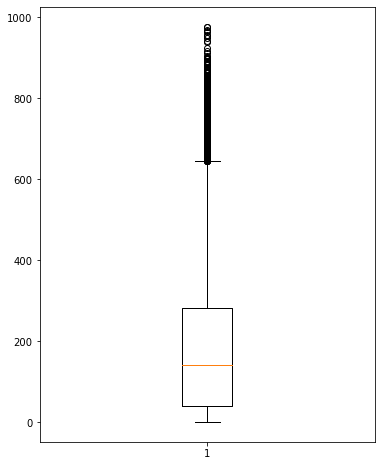

In [11]:
plt.figure(figsize=(6,8))
plt.boxplot(train['cnt'])

As is visible in the above box plot, many values lie in the outlier range of the boxplot, and these outlier values can have a negative impact on the linear regression prediction model. The outlier values can have a dramatic impact on the linear regression model and hence we end up getting a very high value of our metric of measurement which in this case is mean squared error.

## Decision Tree Model
The second model that we are going to train is a Decision tree model. We use the same features that we used in the last model, and we'll allow for the features to be selected by setting a limit on some criteria so that our model is not too sensitive to small changes and to reduce the possibility of overfitting.

In [12]:


reg = DecisionTreeRegressor()
reg.fit(train[features], train['cnt'])

predictions = reg.predict(test[features])

mse = mean_squared_error(test['cnt'], predictions)
mse

3513.713895281933

In [13]:
# changing the max_levels to 5 
reg = DecisionTreeRegressor(min_samples_leaf =10,max_depth=15)
reg.fit(train[features],train['cnt'])
predictions = reg.predict(test[features])

mse = mean_squared_error(test['cnt'],predictions)
print('test mse: ',mse)
train_predictions = reg.predict(train[features])

mse_train = mean_squared_error(train['cnt'], train_predictions)
print('train mse:', mse_train)

test mse:  2950.6496352287663
train mse: 1880.355874255372


We were able to reduce the mse value from 17054 to 3559 by changing the model from linear Regression to Decision Tree. Further the mse value can be reduced by changing some parameters of the Decision tree regressor model by limiting the maximum depth of the tree to be 15 and having at least 10 samples in each leaf. This ensures that our tree is not overfitting otherwise it would perform better on the training data as compared to test data. But still the difference between the train mse value and test mse value is big and thus there is some evidence of overfitting. To overcome this, we try RandomForest prediction model.

## Random Forest Model

In [14]:

reg = RandomForestRegressor()
reg.fit(train[features],train['cnt'])
predictions = reg.predict(test[features])

mse = mean_squared_error(test['cnt'],predictions)
print('test mse: ',mse)
train_predictions = reg.predict(train[features])

mse_train = mean_squared_error(train['cnt'], train_predictions)
print('train mse:', mse_train)

test mse:  1932.7611414612502
train mse: 255.08818280848348


In [15]:
reg = RandomForestRegressor(max_depth=15)
reg.fit(train[features],train['cnt'])
predictions = reg.predict(test[features])

mse = mean_squared_error(test['cnt'],predictions)
print('test mse: ',mse)
train_predictions = reg.predict(train[features])

mse_train = mean_squared_error(train['cnt'], train_predictions)
print('train mse:', mse_train)

test mse:  1985.086664756097
train mse: 444.2417212338503


Using the random Forest model, we were able to further reduce the mse value to nearly 1950 which is much better when compared to linear regression model or Decision Tree model. The Random Forest model handles overfitting and thus the test mse values tend to be better as compared to the normal Decision tree model.